<a href="https://colab.research.google.com/github/HyeranYang/STUDY_kaggle_data_analysis/blob/main/churn_%EB%B6%84%EB%A5%98_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비

* 고객? 직원? 이 해당 은행에 남아있을지 여부 예측(Exited 열)


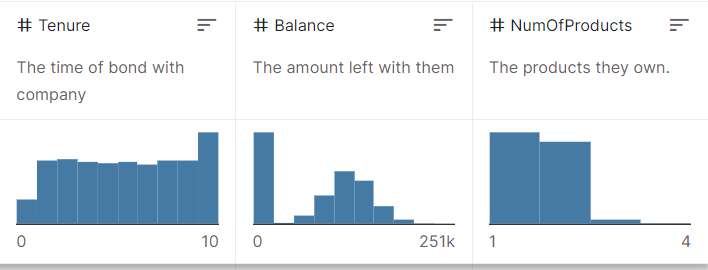

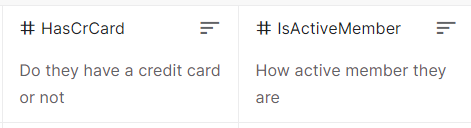

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/스터디/3. churn modeling - deep learning/Churn_Modelling.csv'

In [ ]:
data = pd.read_csv(url, index_col='RowNumber')

In [ ]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

# null 값이 없다. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


# EDA

## Surname

In [ ]:
data['Surname'].value_counts()   # 이름이 많이 겹치네.

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [ ]:
data['Surname'].value_counts()[:10]  # 빈도수 상위 10개 이름

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Yeh         25
Shih        25
Genovese    25
Maclean     24
Wright      24
Name: Surname, dtype: int64

## CreditScore 

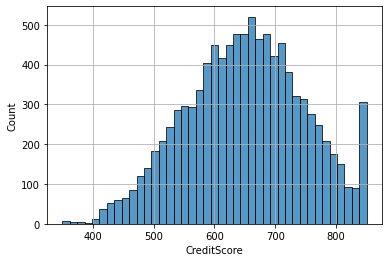

In [ ]:
sns.histplot(x='CreditScore', data=data)
plt.grid()
plt.show()

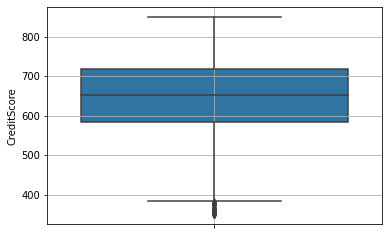

In [ ]:
sns.boxplot(y='CreditScore', data=data)
plt.grid()
plt.show()

## Geography

In [ ]:
geo_count = data['Geography'].value_counts()
geo_count

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

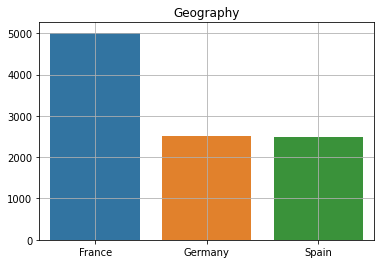

In [ ]:
sns.barplot(x=geo_count.index, y=geo_count.values)
plt.title('Geography')
plt.grid()
plt.show()

# 프랑스가 가장 많고, 독일, 스페인은 비슷하다.

## Gender	

In [ ]:
gen = data['Gender'].value_counts()
gen 

Male      5457
Female    4543
Name: Gender, dtype: int64

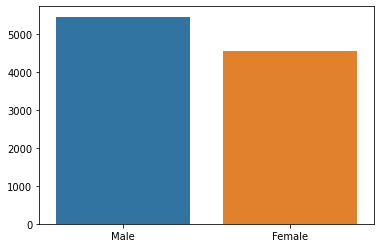

In [ ]:
sns.barplot(x=gen.index, y=gen.values)
plt.show()

## Age

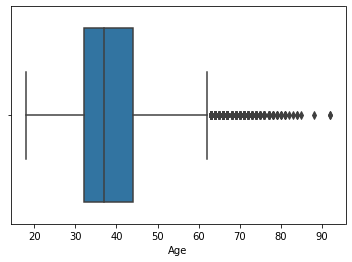

In [ ]:
sns.boxplot(x='Age', data=data)
plt.show()

In [ ]:
data['Age'].value_counts()[:10]   # 30대 후반~40대가 제일 많다.

37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
Name: Age, dtype: int64

## Tenure


In [ ]:
tenure = data['Tenure'].value_counts()
tenure 

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

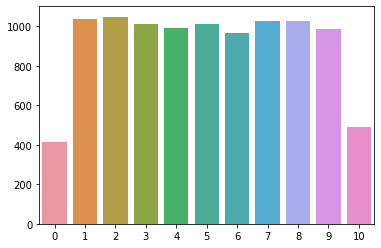

In [ ]:
sns.barplot(x=tenure.index, y=tenure.values)
plt.show()

# 대체로 분포가 일정하다.

## Balance	

In [ ]:
data['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

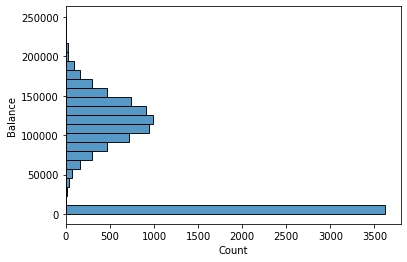

In [ ]:
sns.histplot(y='Balance', data=data)
plt.show()

## NumOfProducts

In [ ]:
num = data['NumOfProducts'].value_counts()
num

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

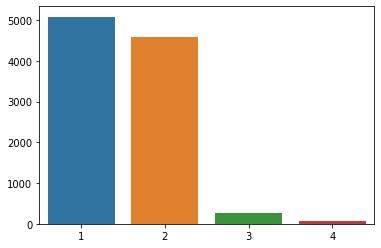

In [ ]:
sns.barplot(x=num.index, y=num.values)
plt.show()

## HasCrCard

In [ ]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

## IsActiveMember

In [ ]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

## EstimatedSalary

In [ ]:
data['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

## Exited

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# 데이터 전처리

## Geography, Gender Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal = OrdinalEncoder()

In [ ]:
result = ordinal.fit_transform(data[['Geography', 'Gender']])

# ordinal encoder는 2차원 배열을 input으로 받음.

In [ ]:
ordinal.categories_  # 순서대로 숫자가 부여됨.

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [ ]:
result.astype('int')

array([[0, 0],
       [2, 0],
       [0, 0],
       ...,
       [0, 0],
       [1, 1],
       [0, 0]])

In [ ]:
data[['Geography', 'Gender']] = result.astype('int')

In [ ]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## 여기까지 데이터 카피

In [ ]:
all = data.copy()

In [ ]:
all.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## CustomerI, Surname  Drop

In [ ]:
all.drop(columns=['CustomerId', 'Surname'], inplace=True)

In [ ]:
all.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## X, y 정의, 훈련/테스트셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y = all.pop('Exited')

In [ ]:
y[:5]

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

In [ ]:
X = all  # 전처리의 편의성을 위해, df로 일단 남겨둔다.
# 컬럼명을 사용하기 위해.

In [ ]:
X[:5]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88
2,608,2,0,41,1,83807.86,1,0,1,112542.58
3,502,0,0,42,8,159660.80,3,1,0,113931.57
4,699,0,0,39,1,0.00,2,0,0,93826.63
5,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3,
                                          stratify=y)

In [ ]:
X_tr.shape, y_tr.shape

((7000, 10), (7000,))

In [ ]:
X_te.shape, y_te.shape

((3000, 10), (3000,))

## CreditScore, Age, Balance, EstimatedSalary  표준화.
- 딥러닝도 파이프라인 만들어서 한번에 전처리랑 모델 학습할 수 있나???
- 일단 먼저 표준화 한다음 딥러닝 해보자.

In [ ]:
std = StandardScaler()

In [ ]:
X_tr[['CreditScore']] = std.fit_transform(X_tr[['CreditScore']])

In [ ]:
X_tr[:5]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
9223,-0.939040,0,1,28,3,141099.43,1,1,1,15607.27
686,0.111243,2,1,42,2,178820.91,1,0,0,29358.57
3018,-0.619837,2,0,29,2,166930.76,2,1,0,122487.73
4309,-0.094695,0,0,40,7,0.00,1,1,0,126996.67
1205,-0.207961,0,0,40,7,0.00,2,1,1,34453.17


In [ ]:
# test 셋에서는 transform 만 해준다.

X_te[['CreditScore']] = std.transform(X_te[['CreditScore']])

In [ ]:
X_te[:5]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
9100,0.904105,0,1,29,2,0.00,2,1,1,170421.13
1237,0.121540,1,1,33,0,103471.52,1,1,1,162703.00
9996,1.243902,0,1,39,5,0.00,2,1,0,96270.64
3186,0.018571,1,0,45,9,110827.49,1,1,1,153383.54
6139,-1.783386,0,1,47,9,144900.58,1,1,0,61315.37


In [ ]:
std = StandardScaler()

In [ ]:
X_tr[['Age', 'Balance', 'EstimatedSalary']] = std.fit_transform(X_tr[['Age', 'Balance', 'EstimatedSalary']])

In [ ]:
X_tr.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
9223,-0.939040,0,1,-1.039068,3,1.039789,1,1,1,-1.478651
686,0.111243,2,1,0.293506,2,1.643262,1,0,0,-1.239872
3018,-0.619837,2,0,-0.943884,2,1.453042,2,1,0,0.377229
4309,-0.094695,0,0,0.103138,7,-1.217538,1,1,0,0.455522
1205,-0.207961,0,0,0.103138,7,-1.217538,2,1,1,-1.151409


In [ ]:
X_te[['Age', 'Balance', 'EstimatedSalary']] = std.transform(X_te[['Age', 'Balance', 'EstimatedSalary']])

In [ ]:
X_te.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
9100,0.904105,0,1,-0.943884,2,-1.217538,2,1,1,1.209547
1237,0.121540,1,1,-0.563148,0,0.437813,1,1,1,1.075529
9996,1.243902,0,1,0.007955,5,-1.217538,2,1,0,-0.078007
3186,0.018571,1,0,0.579058,9,0.555494,1,1,1,0.913706
6139,-1.783386,0,1,0.769425,9,1.100600,1,1,0,-0.684972


In [ ]:
# df -> 배열로 변환
X_tr = X_tr.values
X_te = X_te.values

In [ ]:
X_tr[:5]

array([[-0.93904046,  0.        ,  1.        , -1.03906755,  3.        ,
         1.03978871,  1.        ,  1.        ,  1.        , -1.47865062],
       [ 0.11124329,  2.        ,  1.        ,  0.29350616,  2.        ,
         1.64326165,  1.        ,  0.        ,  0.        , -1.23987215],
       [-0.61983658,  2.        ,  0.        , -0.94388372,  2.        ,
         1.45304154,  2.        ,  1.        ,  0.        ,  0.37722865],
       [-0.0946947 ,  0.        ,  0.        ,  0.10313849,  7.        ,
        -1.21753756,  1.        ,  1.        ,  0.        ,  0.45552218],
       [-0.2079606 ,  0.        ,  0.        ,  0.10313849,  7.        ,
        -1.21753756,  2.        ,  1.        ,  1.        , -1.15140918]])

In [ ]:
X_te[:5]

array([[ 9.04104552e-01,  0.00000000e+00,  1.00000000e+00,
        -9.43883715e-01,  2.00000000e+00, -1.21753756e+00,
         2.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.20954733e+00],
       [ 1.21540189e-01,  1.00000000e+00,  1.00000000e+00,
        -5.63148369e-01,  0.00000000e+00,  4.37812715e-01,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.07552922e+00],
       [ 1.24390224e+00,  0.00000000e+00,  1.00000000e+00,
         7.95464919e-03,  5.00000000e+00, -1.21753756e+00,
         2.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -7.80066067e-02],
       [ 1.85711938e-02,  1.00000000e+00,  0.00000000e+00,
         5.79057668e-01,  9.00000000e+00,  5.55494439e-01,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         9.13705508e-01],
       [-1.78338622e+00,  0.00000000e+00,  1.00000000e+00,
         7.69425341e-01,  9.00000000e+00,  1.10059998e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -6.

# 딥러닝 모델링

## 레이어 1개, 나머지 기본값 : 0.8113

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Dense(units=1, activation='sigmoid',
                             input_shape=(10,)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [ ]:
model.fit(X_tr, y_tr, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.5535 - binary_accuracy: 0.7537
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5003 - binary_accuracy: 0.7816
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4747 - binary_accuracy: 0.7906
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4601 - binary_accuracy: 0.7957
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4513 - binary_accuracy: 0.7987
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4461 - binary_accuracy: 0.8013
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4429 - binary_accuracy: 0.8017
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4405 - binary_accuracy: 0.8040
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4393 - binary_accuracy: 0.8051
Epoch 10/100
219/219 [======

In [ ]:
pred = model.predict(X_te)

In [ ]:
pred_label = (pred > 0.5).astype('int').reshape((-1,))  # true면 1, false면 0 반환 -> 1차원 배열로 reshape
pred_label[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.mean(y_te == pred_label)

0.8066666666666666

### batch_size 변경

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Dense(units=1, activation='sigmoid', input_shape=(10,)))

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [ ]:
model.fit(X_tr, y_tr, epochs=100, batch_size=10)

Epoch 1/100
700/700 [==============================] - 1s 1ms/step - loss: 0.5690 - binary_accuracy: 0.7683
Epoch 2/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4740 - binary_accuracy: 0.7909
Epoch 3/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4528 - binary_accuracy: 0.7944
Epoch 4/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4456 - binary_accuracy: 0.7980
Epoch 5/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4403 - binary_accuracy: 0.7990
Epoch 6/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4382 - binary_accuracy: 0.8014
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4370 - binary_accuracy: 0.8044
Epoch 8/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4348 - binary_accuracy: 0.8067
Epoch 9/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4351 - binary_accuracy: 0.8067
Epoch 10/100
700/700 [======

In [ ]:
pred = model.predict(X_te)
pred_label = (pred > 0.5).astype('int').reshape(-1,)
np.mean(y_te == pred_label)

0.8056666666666666

## batch_normalization 층만 추가했을땐? : 0.7963

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Dense(units=1, activation=keras.activations.sigmoid,
                             input_shape=(10,)))

In [ ]:
model.add(keras.layers.BatchNormalization())

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 batch_normalization (BatchN  (None, 1)                4         
 ormalization)                                                   
                                                                 
Total params: 15
Trainable params: 13
Non-trainable params: 2
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [ ]:
model.fit(X_tr, y_tr, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 2.1465 - binary_accuracy: 0.7296
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4890 - binary_accuracy: 0.7963
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4827 - binary_accuracy: 0.7963
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4761 - binary_accuracy: 0.7960
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4757 - binary_accuracy: 0.7956
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4713 - binary_accuracy: 0.7966
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4671 - binary_accuracy: 0.7943
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4637 - binary_accuracy: 0.7923
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4632 - binary_accuracy: 0.7899
Epoch 10/100
219/219 [======

In [ ]:
model.evaluate(X_te, y_te)

94/94 [==============================] - 0s 1ms/step - loss: 3.1523 - binary_accuracy: 0.7953


[3.1523184776306152, 0.7953333258628845]

## 은닉층 추가(relu) : 0.8287

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=10, activation='relu',
                             input_shape=(10,)))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [ ]:
model.fit(X_te, y_te, epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.5982 - binary_accuracy: 0.7173
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5424 - binary_accuracy: 0.7877
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5234 - binary_accuracy: 0.7927
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5101 - binary_accuracy: 0.7950
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4995 - binary_accuracy: 0.7950
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4919 - binary_accuracy: 0.7953
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4856 - binary_accuracy: 0.7957
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4797 - binary_accuracy: 0.7953
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4752 - binary_accuracy: 0.7953
Epoch 10/100
94/94 [==========================

In [ ]:
model.evaluate(X_te, y_te)

94/94 [==============================] - 0s 1ms/step - loss: 0.4289 - binary_accuracy: 0.8073


[0.4289109706878662, 0.8073333501815796]

## 은닉층 추가(relu), 배치 정규화 추가 : 0.8527

* 참고자료 : https://www.kaggle.com/code/niteshyadav3103/customer-churn-prediction-using-ann


In [ ]:
model = keras.Sequential()

In [ ]:
model.add(layer=keras.layers.Dense(units=10, 
                                   kernel_initializer='random_normal',
                                   activation = 'relu',
                                   input_shape=(10,)))
# kernel_initializer: kernel 가중치 행렬의 초기값 설정기

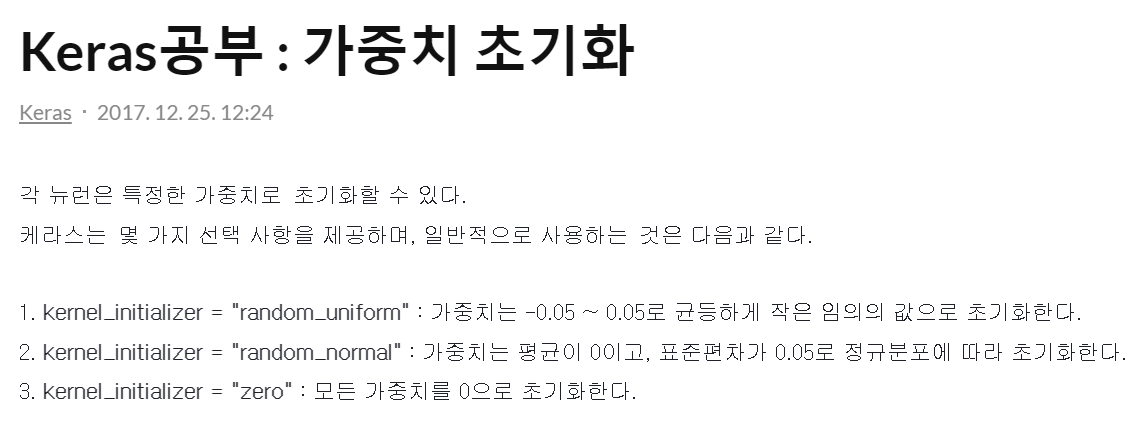

In [ ]:
# drop out - overfitting 줄이기 위한 규제
model.add(keras.layers.BatchNormalization())

* Batch Nomalization 설명 : https://sacko.tistory.com/44
* 배치 정규화는 활성화함수의 활성화값 또는 출력값을 정규화(정규분포로 만든다)하는 작업을 말한다.

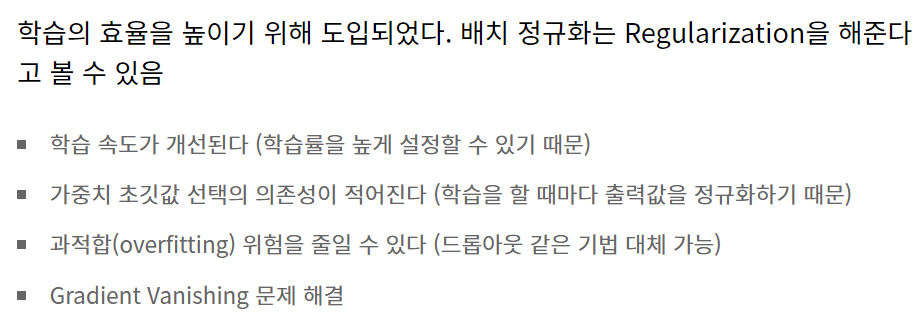

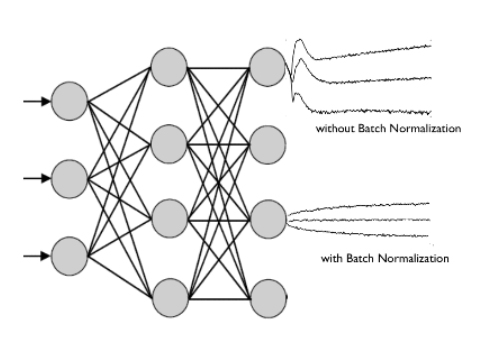

In [ ]:
model.add(keras.layers.Dense(units=1, activation=keras.activations.sigmoid))

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [ ]:
history = model.fit(X_tr, y_tr, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.5384 - binary_accuracy: 0.7576
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4573 - binary_accuracy: 0.7997
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4408 - binary_accuracy: 0.8060
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4362 - binary_accuracy: 0.8077
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4251 - binary_accuracy: 0.8166
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4240 - binary_accuracy: 0.8190
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4218 - binary_accuracy: 0.8210
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4171 - binary_accuracy: 0.8239
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4134 - binary_accuracy: 0.8314
Epoch 10/100
219/219 [======

In [ ]:
model.evaluate(X_te, y_te)

# 정확도가 올라갔다. binary_accuracy: 0.8527

94/94 [==============================] - 0s 1ms/step - loss: 0.3698 - binary_accuracy: 0.8500


[0.36978647112846375, 0.8500000238418579]

## 은닉층 추가: ELU : 0.8393

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Dense(units=10, activation=keras.activations.elu,
                             input_shape=(10,)))

In [ ]:
model.add(keras.layers.Dense(units=1, activation=keras.activations.sigmoid))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [ ]:
model.fit(X_tr, y_tr, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 0.5249 - binary_accuracy: 0.7684
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4563 - binary_accuracy: 0.8044
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4441 - binary_accuracy: 0.8049
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4393 - binary_accuracy: 0.8056
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4375 - binary_accuracy: 0.8070
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4361 - binary_accuracy: 0.8090
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4348 - binary_accuracy: 0.8070
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4349 - binary_accuracy: 0.8084
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4337 - binary_accuracy: 0.8100
Epoch 10/100
219/219 [======

In [ ]:
model.evaluate(X_te, y_te)

# 은닉층만 추가했는데, 정확도가  0.8393로 올라갔다.

94/94 [==============================] - 0s 1ms/step - loss: 0.4169 - binary_accuracy: 0.8333


[0.41693368554115295, 0.8333333134651184]

## 은닉층 추가(ELU), 배치 정규화 추가 : 0.8330

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Dense(units=10, activation=keras.activations.elu,
                             input_shape=(10,)))

In [ ]:
model.add(keras.layers.BatchNormalization())

In [ ]:
model.add(keras.layers.Dense(units=1, activation=keras.activations.sigmoid))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 batch_normalization_2 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 141
Non-trainable params: 20
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [ ]:
model.fit(X_te, y_te, epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.7172 - binary_accuracy: 0.6227
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5572 - binary_accuracy: 0.7450
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5113 - binary_accuracy: 0.7723
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4913 - binary_accuracy: 0.7813
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4757 - binary_accuracy: 0.7843
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4697 - binary_accuracy: 0.7887
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4628 - binary_accuracy: 0.7897
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4602 - binary_accuracy: 0.7873
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4564 - binary_accuracy: 0.7920
Epoch 10/100
94/94 [==========================

In [ ]:
model.evaluate(X_te, y_te)  

94/94 [==============================] - 0s 1ms/step - loss: 0.4178 - binary_accuracy: 0.8293


[0.41781511902809143, 0.8293333053588867]

# 머신러닝 모델링

In [ ]:
from sklearn.neighbors import KNeighborsClassifier